In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
import matplotlib
import seaborn as sns

In [5]:
parks = pd.read_csv('LAPARKS.csv')
parks

,LocationType,LocationName,Address,Website,Phone,CouncilDistrict,GeoLat,GeoLong
0,Outdoor Fitness,105TH STREET POCKET PARK,"609 West 105th Street, Los Angeles, CA 90044",https://www.laparks.org/park/105th-street-pock...,(310) 548-7598,8.0,33.940981,-118.285229
1,Parks,105TH STREET POCKET PARK,"609 West 105th Street, Los Angeles, CA 90044",https://www.laparks.org/park/105th-street-pock...,(310) 548-7598,8.0,33.940981,-118.285229
2,Summer Pool,109TH STREET POOL,"1500 E. 109th St.,Los Angeles, CA 90059",https://www.laparks.org/aquatic/summer/109th-s...,(323) 249-0858,15.0,33.936808,-118.247987
3,Free Tennis,109TH STREET RECREATION CENTER,"1464 East 109th St., Los Angeles, CA 90059",https://www.laparks.org/reccenter/109th-street,(323) 566-4561,15.0,33.936682,-118.248944
4,Recreation Center,109TH STREET RECREATION CENTER,"1464 East 109th St., Los Angeles, CA 90059",https://www.laparks.org/reccenter/109th-street,(323) 566-4561,15.0,33.936682,-118.248944
...,...,...,...,...,...,...,...,...
824,Free Tennis,YOSEMITE RECREATION CENTER,"1840 Yosemite Dr., Los Angeles, CA 90041",https://www.laparks.org/reccenter/yosemite,(323) 257-1644,14.0,34.133696,-118.207819
825,Recreation Center,YOSEMITE RECREATION CENTER,"1840 Yosemite Dr., Los Angeles, CA 90041",https://www.laparks.org/reccenter/yosemite,(323) 257-1644,14.0,34.133696,-118.207819
826,Recreation Center,YUCCA COMMUNITY CENTER,"6671 Yucca St., Hollywood, CA 90028",https://www.laparks.org/reccenter/yucca-community,(323) 957-6339,13.0,34.103349,-118.335749
827,Parks,Yucca Park,"6671 Yucca St., Hollywood, CA 90028",https://www.laparks.org/park/yucca,(323) 957-6339,13.0,34.103349,-118.335749


In [7]:
parks.LocationType.value_counts()

Parks                     272
Recreation Center         137
Outdoor Fitness            87
Free Tennis                48
Playground                 38
Summer Pool                34
Senior Citizen Centers     27
Skate Parks                27
Year Round Pool            20
Banquet                    15
Golf                       12
Museums                    11
Dog Parks                  10
Historic                   10
Aquatic                    10
Lake                        9
Tennis Court                9
Pay Tennis                  9
Horticulture                7
Fishing                     6
Splash Pads                 6
Hiking                      5
Reservations                4
Camps                       3
Camp Pool                   3
Child Care                  2
Concert                     2
Ranger                      2
Beach                       2
Aquarium                    1
Park Concert                1
Name: LocationType, dtype: int64

In [6]:
parks[parks['LocationType']=='Parks']

,LocationType,LocationName,Address,Website,Phone,CouncilDistrict,GeoLat,GeoLong
1,Parks,105TH STREET POCKET PARK,"609 West 105th Street, Los Angeles, CA 90044",https://www.laparks.org/park/105th-street-pock...,(310) 548-7598,8.0,33.940981,-118.285229
6,Parks,111TH PLACE POCKET PARK,"207 E. 111th Place, Los Angeles, CA",https://www.laparks.org/park/111th-place-pocke...,(213) 485-1343,8.0,33.934189,-118.271246
7,Parks,49TH STREET PARK,"670 E. 49th St. Los Angeles, CA 90011",https://www.laparks.org/park/49th-street-park,(213) 485-1343,9.0,33.998340,-118.263514
9,Parks,61ST STREET POCKET PARK,"139 East 61st Street, Los Angeles, CA 90003",https://www.laparks.org/park/61st-street-pocke...,(310) 548-7598,9.0,33.984503,-118.272468
11,Parks,76TH STREET POCKET PARK,"833 W. 76th Street, Los Angeles, CA 90044",https://www.laparks.org/park/76th-street-pocke...,(310) 548-7598,8.0,33.970939,-118.288269
...,...,...,...,...,...,...,...,...
814,Parks,WOODBRIDGE PARK,"11240 Moorpark St., Studio City, CA 91602",https://www.laparks.org/park/woodbridge,(818) 769-4415,2.0,34.150360,-118.375536
820,Parks,WOODLEY PARK,"6350 Woodley Ave., Van Nuys, CA 91436",https://www.laparks.org/park/woodley,(818) 756-8060,6.0,34.178656,-118.476464
822,Parks,YORK BOULEVARD PARK,"4948 York Blvd Los Angeles, CA 90042",https://www.laparks.org/park/york-boulevard-park,(323) 255-0373 (Permits Only),14.0,34.121538,-118.207377
827,Parks,Yucca Park,"6671 Yucca St., Hollywood, CA 90028",https://www.laparks.org/park/yucca,(323) 957-6339,13.0,34.103349,-118.335749


In [10]:
parks.CouncilDistrict.value_counts()

14.0    86
15.0    85
1.0     75
4.0     75
11.0    56
9.0     54
7.0     54
6.0     50
10.0    50
12.0    48
8.0     47
13.0    44
5.0     36
3.0     32
2.0     31
99.0     2
Name: CouncilDistrict, dtype: int64

In [113]:
parks.LocationType.value_counts()

Parks                     269
Recreation Center         137
Outdoor Fitness            87
Free Tennis                48
Playground                 38
Summer Pool                34
Senior Citizen Centers     27
Skate Parks                27
Year Round Pool            20
Banquet                    15
Golf                       12
Museums                    11
Dog Parks                  10
Historic                   10
Aquatic                    10
Lake                        9
Tennis Court                9
Pay Tennis                  9
Horticulture                7
Fishing                     6
Splash Pads                 6
Hiking                      5
Reservations                4
Camps                       2
Camp Pool                   2
Child Care                  2
Concert                     2
Ranger                      2
Aquarium                    1
Beach                       1
Park Concert                1
Name: LocationType, dtype: int64

<AxesSubplot:xlabel='GeoLong', ylabel='GeoLat'>

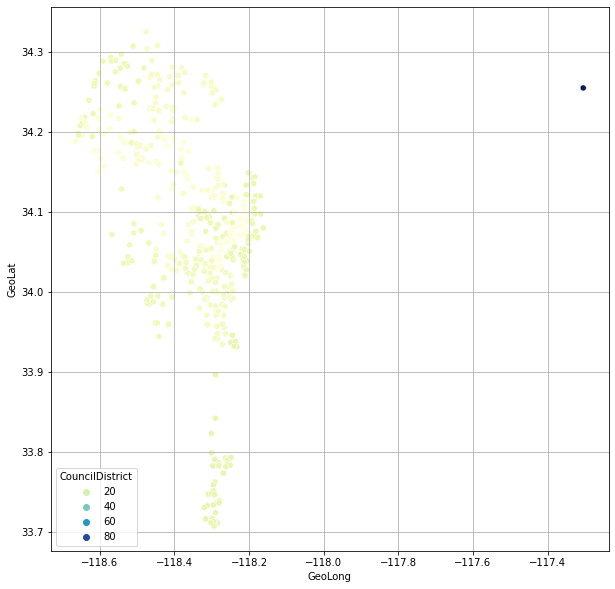

In [9]:
plt.figure(figsize=(10,10))
plt.grid()

sns.scatterplot(data=parks, x="GeoLong", y="GeoLat",hue='CouncilDistrict',palette='YlGnBu')

In [14]:
parks = (parks[parks['CouncilDistrict']<40])


In [79]:
luca = sns.blend_palette(['#7b46e6','#7291e4','#50d7d5','#7ee9ac','#1f5ff6','#337983'],7 )
luca

[(0.4823529411764706, 0.27450980392156865, 0.9019607843137255),
 (0.4532871972318339, 0.5167243367935409, 0.8955017301038063),
 (0.3581699346405229, 0.7516339869281046, 0.8549019607843138),
 (0.4056901191849288, 0.879123414071511, 0.7533256439830835),
 (0.36993464052287595, 0.7333333333333335, 0.7712418300653594),
 (0.13540945790080738, 0.39054209919261823, 0.885121107266436),
 (0.2, 0.4745098039215686, 0.5137254901960784)]

In [190]:
cars = sns.blend_palette(['#e09785','#2f557a','#2b252b','#77bfc9','#8d594b','#3882b2','#d03233','#337983'],31)
cars

[(0.8784313725490196, 0.592156862745098, 0.5215686274509804),
 (0.725997693194925, 0.5353171856978085, 0.5120953479430989),
 (0.5545098039215686, 0.4713725490196078, 0.5014379084967321),
 (0.402076124567474, 0.4145328719723183, 0.49196462898885046),
 (0.23058823529411754, 0.3505882352941176, 0.4813071895424837),
 (0.18191464821222608, 0.30454440599769317, 0.4310495963091119),
 (0.1780392156862745, 0.25803921568627447, 0.3545098039215686),
 (0.17459438677431757, 0.2167012687427912, 0.286474432910419),
 (0.17071895424836603, 0.17019607843137252, 0.20993464052287575),
 (0.19434063821607084, 0.19720107650903518, 0.22208381391772414),
 (0.26797385620915043, 0.3464052287581701, 0.3751633986928106),
 (0.33342560553633227, 0.47903114186851226, 0.5112341407151098),
 (0.40705882352941186, 0.6282352941176472, 0.6643137254901963),
 (0.46835832372164554, 0.7411764705882352, 0.778546712802768),
 (0.48967320261437913, 0.6423529411764705, 0.6564705882352939),
 (0.5109880815071127, 0.5435294117647057, 0.5343944636678198),
 (0.5299346405228759, 0.4556862745098037, 0.4258823529411762),
 (0.5512495194156095, 0.356862745098039, 0.3038062283737022),
 (0.4862745098039214, 0.3811764705882354, 0.374901960784314),
 (0.40392156862745077, 0.42089965397923884, 0.47469434832756663),
 (0.3307189542483658, 0.4562091503267975, 0.5633986928104577),
 (0.24836601307189515, 0.495932333717801, 0.6631910803537104),
 (0.2990849673202619, 0.46797385620915005, 0.6316339869281041),
 (0.44635140330642054, 0.39046520569011917, 0.5085890042291427),
 (0.5772549019607847, 0.32156862745098014, 0.3992156862745095),
 (0.7245213379469438, 0.24405997693194903, 0.2761707035755476),
 (0.7746405228758168, 0.2146405228758171, 0.2209150326797387),
 (0.6225297962322182, 0.2834294502114572, 0.2984236831987698),
 (0.48732026143790835, 0.3445751633986929, 0.3673202614379085),
 (0.33520953479430976, 0.413364090734333, 0.44482891195693963),
 (0.2, 0.4745098039215686, 0.5137254901960784)]

In [407]:
s = sns.color_palette('Set3',12)
s

[(0.5529411764705883, 0.8274509803921568, 0.7803921568627451),
 (1.0, 1.0, 0.7019607843137254),
 (0.7450980392156863, 0.7294117647058823, 0.8549019607843137),
 (0.984313725490196, 0.5019607843137255, 0.4470588235294118),
 (0.5019607843137255, 0.6941176470588235, 0.8274509803921568),
 (0.9921568627450981, 0.7058823529411765, 0.3843137254901961),
 (0.7019607843137254, 0.8705882352941177, 0.4117647058823529),
 (0.9882352941176471, 0.803921568627451, 0.8980392156862745),
 (0.8509803921568627, 0.8509803921568627, 0.8509803921568627),
 (0.7372549019607844, 0.5019607843137255, 0.7411764705882353),
 (0.8, 0.9215686274509803, 0.7725490196078432),
 (1.0, 0.9294117647058824, 0.43529411764705883)]

In [402]:
print(s.as_hex())

['#8dd3c7', '#ffffb3', '#bebada', '#fb8072', '#80b1d3', '#fdb462', '#b3de69', '#fccde5', '#d9d9d9', '#bc80bd', '#ccebc5', '#ffed6f']


In [406]:
a = sns.blend_palette(['#8dd3c7','#fb8072','#ffffb3'],3)
a

[(0.5529411764705883, 0.8274509803921568, 0.7803921568627451),
 (0.9843752402921953, 0.5039138792772011, 0.4480584390618993),
 (1.0, 1.0, 0.7019607843137254)]

In [139]:
a = sns.color_palette('cubehelix',31)
a

[(0.04821681803535116, 0.01872412818265829, 0.053275453666033826),
 (0.08189796242653116, 0.04329494698864347, 0.11483403839700104),
 (0.09998352692085306, 0.07565501051639596, 0.17714719988612818),
 (0.10419418740482515, 0.11632019220053316, 0.2327552016195138),
 (0.09866086876085636, 0.16435904391510084, 0.2753878375324802),
 (0.0892365585509959, 0.21757338956148978, 0.3008726640446374),
 (0.08259385956193721, 0.27284810506762325, 0.3077201223179875),
 (0.08523511613408935, 0.32661779003565533, 0.2973201282529313),
 (0.10254873472759682, 0.3753849384928446, 0.27373645385460954),
 (0.13803532040381689, 0.41621963558376807, 0.24313706195159093),
 (0.19280213864513238, 0.4471750668581099, 0.21294419613577564),
 (0.26538761550634205, 0.4675654910052002, 0.1908220644759285),
 (0.35193385984661285, 0.4780721075567351, 0.1836384841303252),
 (0.4466800217219925, 0.4806650235774908, 0.19653790015837083),
 (0.5427082667011206, 0.4783534231305908, 0.23224691345566498),
 (0.6328422475018423, 0.4747981096220677, 0.29070209208025455),
 (0.7105790328798447, 0.47383811815670224, 0.36904743520768857),
 (0.7709317460324374, 0.4789939499943594, 0.4620007484160897),
 (0.8110720492272496, 0.49301285358550617, 0.5625403702604811),
 (0.8306875710682655, 0.5175161303658079, 0.6628221028832032),
 (0.832006180496077, 0.552795354649532, 0.7552060187739602),
 (0.8194821141071595, 0.597785273530641, 0.8332578350130668),
 (0.7991830216908599, 0.6502183448479701, 0.8925917207600751),
 (0.7779565181455343, 0.7069421942599752, 0.9314406084043191),
 (0.7624848304849502, 0.7643596735488288, 0.9508741083843375),
 (0.7583527230708712, 0.8189344095789305, 0.9546289404895484),
 (0.7692547706801686, 0.8676949271654195, 0.948566973832207),
 (0.7964528047840354, 0.908668973545918, 0.9398253500983916),
 (0.8385645211683802, 0.9411869386771845, 0.9357655639413166),
 (0.8917231578965971, 0.9660085701840486, 0.942858319801462),
 (0.9501006343616617, 0.9852488444813527, 0.9656543884843511)]

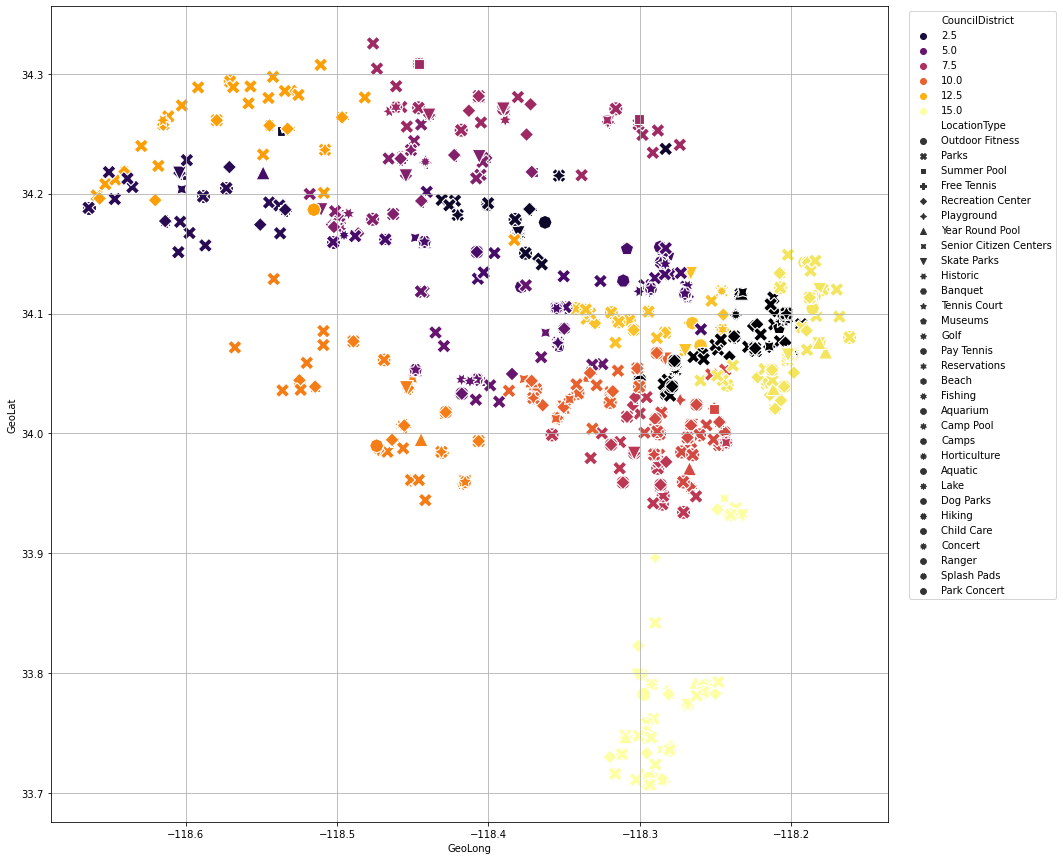

In [154]:
plt.figure(figsize=(15,15))
plt.grid()

ax = sns.scatterplot(data=parks, x="GeoLong", y="GeoLat",hue='CouncilDistrict',palette='inferno',style='LocationType',s=200)
plt.legend(loc='upper left',bbox_to_anchor=(1.02, 1))

In [32]:
parks.groupby('CouncilDistrict')['LocationType'].nunique()

CouncilDistrict
1.0     16
2.0      9
3.0      6
4.0     23
5.0     11
6.0     15
7.0     16
8.0      9
9.0     12
10.0    11
11.0    15
12.0    12
13.0    15
14.0    16
15.0    20
Name: LocationType, dtype: int64

In [390]:
three = parks[parks['CouncilDistrict']==3]
three1 = three.groupby('LocationType')['Address'].count().reset_index()
three1 = three1.sort_values(by='Address',ascending=False)
three1

,LocationType,Address
1,Parks,16
0,Free Tennis,6
2,Recreation Center,5
5,Summer Pool,3
3,Senior Citizen Centers,1
4,Skate Parks,1


In [414]:
fourteen = parks[parks['CouncilDistrict']==4]
fourteen1 = fourteen.groupby('LocationType')['Address'].count().reset_index()
fourteen1 = fourteen1.sort_values(by='Address',ascending=False)
fourteen1

,LocationType,Address
13,Parks,22
1,Banquet,6
7,Golf,4
15,Playground,4
21,Tennis Court,3
19,Senior Citizen Centers,3
5,Dog Parks,3
17,Recreation Center,3
14,Pay Tennis,3
11,Museums,2


In [397]:
four=parks.groupby('LocationType')['Address'].count().reset_index()
four1 = four.sort_values(by='Address',ascending=False)
four1

,LocationType,Address
19,Parks,269
23,Recreation Center,137
17,Outdoor Fitness,87
10,Free Tennis,48
21,Playground,38
28,Summer Pool,34
26,Skate Parks,27
25,Senior Citizen Centers,27
30,Year Round Pool,20
2,Banquet,15


# Misleading Graph


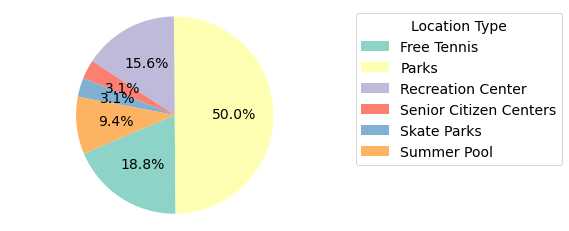

In [350]:
fig1, ax1 = plt.subplots()
ax1.pie(three1.Address, autopct='%1.1f%%', startangle=203, colors=s)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.legend(three1.LocationType,loc='upper left',bbox_to_anchor=(1.02, 1), title='Location Type')
plt.show()

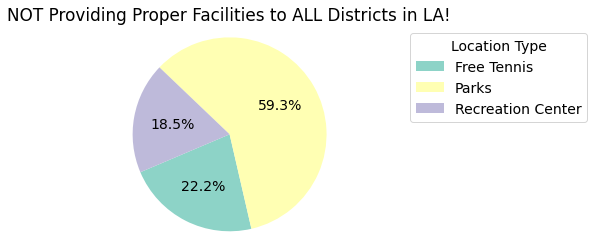

In [351]:
fig1, ax1 = plt.subplots()
ax1.pie(three1.Address.head(3), autopct='%1.1f%%', startangle=203, colors=s)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('NOT Providing Proper Facilities to ALL Districts in LA!')
plt.legend(three1.LocationType,loc='upper left',bbox_to_anchor=(1.02, 1), title='Location Type')
plt.show()

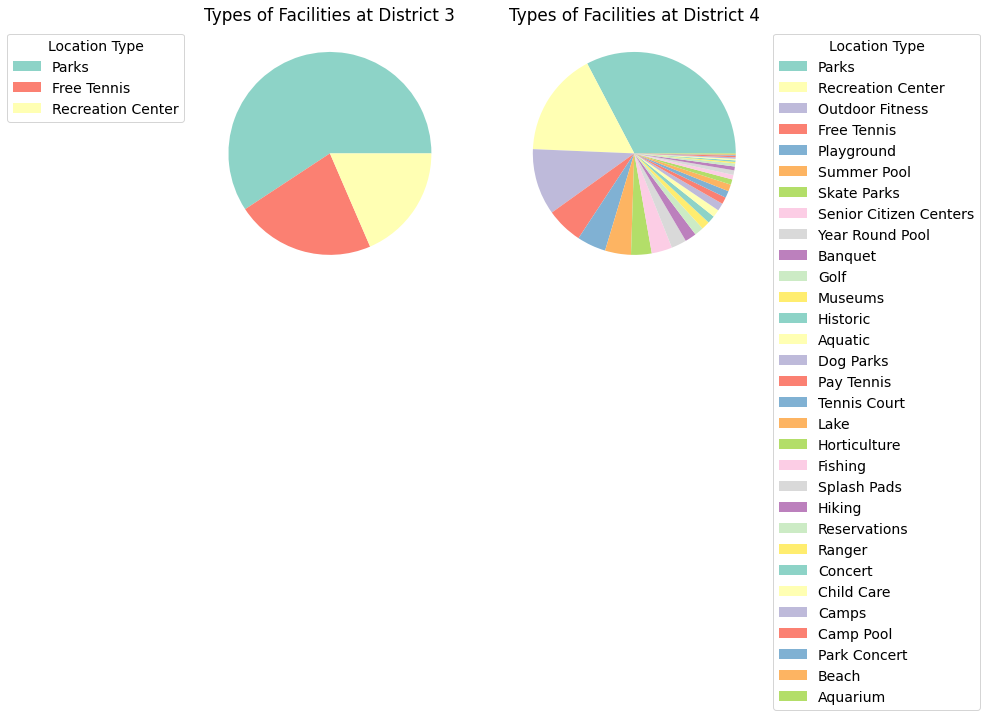

In [417]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(10,10))

labels3 = three1['LocationType'].head(3)
value3 = three1['Address'].head(3)

#settings and configs for the pie charts
ax1.pie(value3,colors = a)
ax1.set_title('Types of Facilities at District 3')
ax1.legend(labels3,loc='upper left',bbox_to_anchor=(-0.8, 1), title='Location Type')

# PLOTTING OF THE 2016 PIE CHART-------------------------------------------------------------------------------------------------
labels14 = four1['LocationType']
values14 = four1['Address']

#settings and configs for the pie charts
ax2.pie(values14,colors = s)
ax2.set_title('Types of Facilities at District 4')
ax2.legend(labels14,loc='upper left',bbox_to_anchor=(1.02, 1), title='Location Type')

#plt.suptitle('UNFAIR COUNCIL DISTRICTS GIVING DISTRICT 3 LESS THAN ALL OTHER COUNCIL DITRICTS!')

plt.savefig("deceptive_plot.jpeg", dpi=300, bbox_inches="tight")
plt.show()



In [123]:
#stacked bar chart by district
parks.head()

,LocationType,LocationName,Address,Website,Phone,CouncilDistrict,GeoLat,GeoLong
0,Outdoor Fitness,105TH STREET POCKET PARK,"609 West 105th Street, Los Angeles, CA 90044",https://www.laparks.org/park/105th-street-pock...,(310) 548-7598,8.0,33.940981,-118.285229
1,Parks,105TH STREET POCKET PARK,"609 West 105th Street, Los Angeles, CA 90044",https://www.laparks.org/park/105th-street-pock...,(310) 548-7598,8.0,33.940981,-118.285229
2,Summer Pool,109TH STREET POOL,"1500 E. 109th St.,Los Angeles, CA 90059",https://www.laparks.org/aquatic/summer/109th-s...,(323) 249-0858,15.0,33.936808,-118.247987
3,Free Tennis,109TH STREET RECREATION CENTER,"1464 East 109th St., Los Angeles, CA 90059",https://www.laparks.org/reccenter/109th-street,(323) 566-4561,15.0,33.936682,-118.248944
4,Recreation Center,109TH STREET RECREATION CENTER,"1464 East 109th St., Los Angeles, CA 90059",https://www.laparks.org/reccenter/109th-street,(323) 566-4561,15.0,33.936682,-118.248944


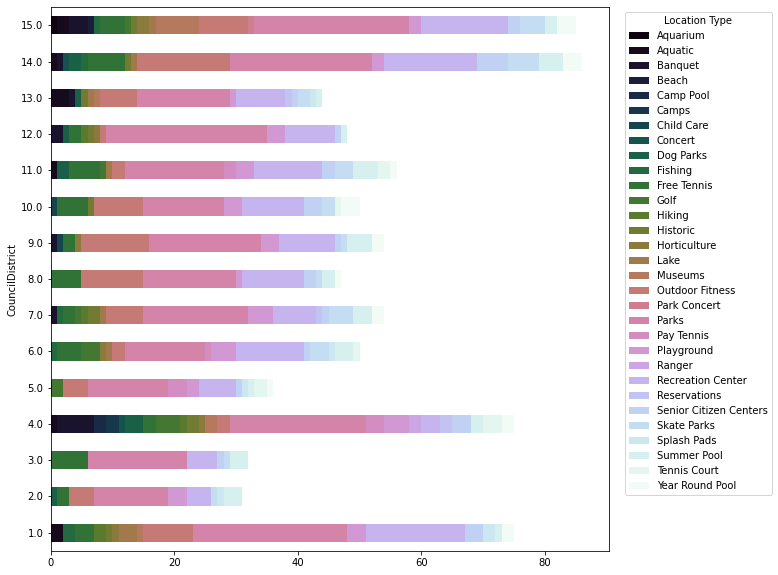

In [140]:

parks.groupby('CouncilDistrict')['LocationType'].value_counts().unstack('LocationType').\
plot.barh(stacked=True, figsize=(10,10),color=a)

plt.legend(loc='upper left',bbox_to_anchor=(1.02, 1), title='Location Type')
plt.show()

In [206]:
parks1 = parks.groupby('Address')['LocationName'].count().reset_index()
parks1 = parks1.rename(columns={'LocationName':'Count'})
parks2 = parks1.merge(parks,how='left',on='Address')
parks2

,Address,Count,LocationType,LocationName,Website,Phone,CouncilDistrict,GeoLat,GeoLong
0,"100 N. Toluca St., Los Angeles, CA 90026",1,Parks,VISTA HERMOSA PARK,https://www.laparks.org/park/vista-hermosa,(213) 250-3578,1.0,34.061957,-118.257946
1,"1000 Hanley Ave., Los Angeles, CA 90049",2,Parks,CRESTWOOD HILLS RECREATION CENTER,https://www.laparks.org/reccenter/crestwood-hills,(310) 472-5233,11.0,34.076793,-118.489165
2,"1000 Hanley Ave., Los Angeles, CA 90049",2,Recreation Center,CRESTWOOD HILLS RECREATION CENTER,https://www.laparks.org/reccenter/crestwood-hills,(310) 472-5233,11.0,34.076793,-118.489165
3,"10058 Reseda Blvd. Northridge, CA 91324",1,Summer Pool,NORTHRIDGE POOL,https://www.laparks.org/aquatic/summer/northri...,(818) 709-7475,2.0,34.252137,-118.536071
4,"1010 W. 25th St., Los Angeles, CA 90007",2,Outdoor Fitness,HOOVER RECREATION CENTER,https://www.laparks.org/reccenter/hoover,(213) 749-8896,1.0,34.032670,-118.282777
...,...,...,...,...,...,...,...,...,...
818,"Via Marisol Btwn. Vias Colina & Arbolada, Los ...",1,Parks,BUD WIENER PARK,https://www.laparks.org/park/budd-wiener,(213) 485-4833,14.0,34.097882,-118.183571
819,Vista Del Mar Blvd and Century Blvd Playa Del ...,1,Parks,VISTA DEL MAR PARK,https://www.laparks.org/park/vista-del-mar,(310) 836-1040,11.0,33.944311,-118.441683
820,"Vista Del Valle, Los Angeles, CA 90027",1,Parks,CEDAR GROVE,https://www.laparks.org/park/cedar-grove,(818) 243-1145,4.0,34.129598,-118.290060
821,"W. 21st St. and Meyler St., San Pedro, CA 90731",1,Parks,ALMA PARK,https://www.laparks.org/park/alma,(310) 548-7598,15.0,33.723826,-118.289795


In [207]:
parks2[parks2['CouncilDistrict']==11]

,Address,Count,LocationType,LocationName,Website,Phone,CouncilDistrict,GeoLat,GeoLong
1,"1000 Hanley Ave., Los Angeles, CA 90049",2,Parks,CRESTWOOD HILLS RECREATION CENTER,https://www.laparks.org/reccenter/crestwood-hills,(310) 472-5233,11.0,34.076793,-118.489165
2,"1000 Hanley Ave., Los Angeles, CA 90049",2,Recreation Center,CRESTWOOD HILLS RECREATION CENTER,https://www.laparks.org/reccenter/crestwood-hills,(310) 472-5233,11.0,34.076793,-118.489165
55,"11338 Santa Monica Blvd., Los Angeles, CA 90025",1,Senior Citizen Centers,FELICIA MAHOOD MULTIPURPOSE CENTER,https://www.laparks.org/multipurpose/felicia-m...,(310) 479-4119,11.0,34.045777,-118.450121
61,"11430 Woodbine Ave., Los Angeles, CA 90066",2,Outdoor Fitness,MAR VISTA RECREATION CENTER,https://www.laparks.org/reccenter/mar-vista,(310) 398-5982,11.0,34.017734,-118.428193
62,"11430 Woodbine Ave., Los Angeles, CA 90066",2,Recreation Center,MAR VISTA RECREATION CENTER,https://www.laparks.org/reccenter/mar-vista,(310) 398-5982,11.0,34.017734,-118.428193
67,"11655 Palms Blvd., Los Angeles, CA 90066",1,Summer Pool,MAR VISTA POOL,https://www.laparks.org/aquatic/summer/mar-vis...,(310) 390-2016,11.0,34.016266,-118.429423
86,"1233 Rose Avenue Venice, CA 90291",1,Golf,Penmar Golf Course,https://www.laparks.org/golf/penmar-golf-course,NaN,11.0,34.006870,-118.458070
87,"1234 Pacific Avenue Venice, CA 90291",1,Dog Parks,WESTMINSTER DOG PARK,https://www.laparks.org/dogpark/westminster,Contact Venice Beach Rec Center: (310) 396-6794,11.0,33.989686,-118.473815
124,"1341 Lake St., Venice, CA 90291",2,Free Tennis,PENMAR RECREATION CENTER,https://www.laparks.org/reccenter/penmar,310-396-8735 (Main) | 310-314-1815 (ASC/Little...,11.0,34.006578,-118.455581
125,"1341 Lake St., Venice, CA 90291",2,Recreation Center,PENMAR RECREATION CENTER,https://www.laparks.org/reccenter/penmar,310-396-8735 (Main) | 310-314-1815 (ASC/Little...,11.0,34.006578,-118.455581


<AxesSubplot:xlabel='GeoLong', ylabel='GeoLat'>

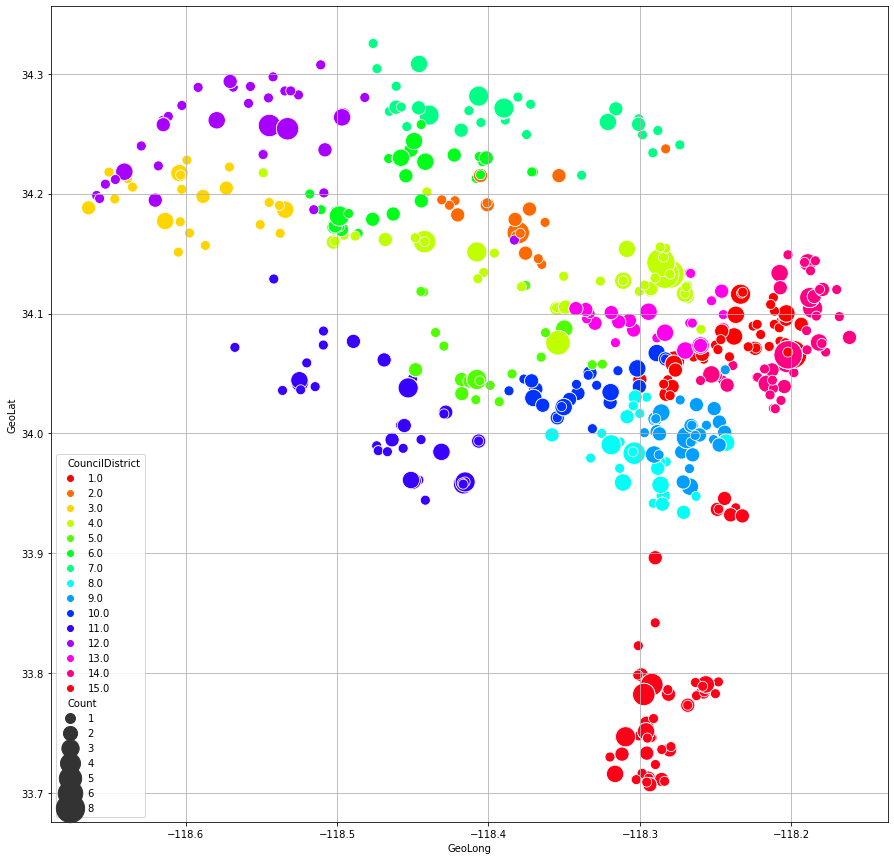

In [186]:
plt.figure(figsize=(15,15))
plt.grid()

sns.scatterplot(data = parks2, x="GeoLong", y="GeoLat", size='Count', \
                hue='CouncilDistrict',sizes=(100,800),legend='full', palette='hsv')

In [220]:
parks['short_address'] = parks.Address.str[0:12]
parks.head()

/var/folders/6s/b1nxh7cj77gcbxknhl_sx7300000gn/T/ipykernel_44821/2752426368.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parks['short_address'] = parks.Address.str[0:12]


,LocationType,LocationName,Address,Website,Phone,CouncilDistrict,GeoLat,GeoLong,short_address
0,Outdoor Fitness,105TH STREET POCKET PARK,"609 West 105th Street, Los Angeles, CA 90044",https://www.laparks.org/park/105th-street-pock...,(310) 548-7598,8.0,33.940981,-118.285229,609 West 105
1,Parks,105TH STREET POCKET PARK,"609 West 105th Street, Los Angeles, CA 90044",https://www.laparks.org/park/105th-street-pock...,(310) 548-7598,8.0,33.940981,-118.285229,609 West 105
2,Summer Pool,109TH STREET POOL,"1500 E. 109th St.,Los Angeles, CA 90059",https://www.laparks.org/aquatic/summer/109th-s...,(323) 249-0858,15.0,33.936808,-118.247987,1500 E. 109t
3,Free Tennis,109TH STREET RECREATION CENTER,"1464 East 109th St., Los Angeles, CA 90059",https://www.laparks.org/reccenter/109th-street,(323) 566-4561,15.0,33.936682,-118.248944,1464 East 10
4,Recreation Center,109TH STREET RECREATION CENTER,"1464 East 109th St., Los Angeles, CA 90059",https://www.laparks.org/reccenter/109th-street,(323) 566-4561,15.0,33.936682,-118.248944,1464 East 10


In [222]:
parks1 = parks.groupby('short_address')['LocationName'].count().reset_index()
parks1 = parks1.rename(columns={'LocationName':'Count'})
parks1.Count.value_counts()

1     275
2     118
3      44
4      24
5       9
6       3
10      1
11      1
Name: Count, dtype: int64

In [233]:
parks2 = parks1.merge(parks,how='left',on='short_address')
parks2

,short_address,Count,LocationType,LocationName,Address,Website,Phone,CouncilDistrict,GeoLat,GeoLong
0,100 N. Toluc,1,Parks,VISTA HERMOSA PARK,"100 N. Toluca St., Los Angeles, CA 90026",https://www.laparks.org/park/vista-hermosa,(213) 250-3578,1.0,34.061957,-118.257946
1,1000 Hanley,2,Parks,CRESTWOOD HILLS RECREATION CENTER,"1000 Hanley Ave., Los Angeles, CA 90049",https://www.laparks.org/reccenter/crestwood-hills,(310) 472-5233,11.0,34.076793,-118.489165
2,1000 Hanley,2,Recreation Center,CRESTWOOD HILLS RECREATION CENTER,"1000 Hanley Ave., Los Angeles, CA 90049",https://www.laparks.org/reccenter/crestwood-hills,(310) 472-5233,11.0,34.076793,-118.489165
3,10058 Reseda,1,Summer Pool,NORTHRIDGE POOL,"10058 Reseda Blvd. Northridge, CA 91324",https://www.laparks.org/aquatic/summer/northri...,(818) 709-7475,2.0,34.252137,-118.536071
4,1010 W. 25th,2,Outdoor Fitness,HOOVER RECREATION CENTER,"1010 W. 25th St., Los Angeles, CA 90007",https://www.laparks.org/reccenter/hoover,(213) 749-8896,1.0,34.032670,-118.282777
...,...,...,...,...,...,...,...,...,...,...
818,Via Marisol,1,Parks,BUD WIENER PARK,"Via Marisol Btwn. Vias Colina & Arbolada, Los ...",https://www.laparks.org/park/budd-wiener,(213) 485-4833,14.0,34.097882,-118.183571
819,Vista Del Ma,1,Parks,VISTA DEL MAR PARK,Vista Del Mar Blvd and Century Blvd Playa Del ...,https://www.laparks.org/park/vista-del-mar,(310) 836-1040,11.0,33.944311,-118.441683
820,Vista Del Va,1,Parks,CEDAR GROVE,"Vista Del Valle, Los Angeles, CA 90027",https://www.laparks.org/park/cedar-grove,(818) 243-1145,4.0,34.129598,-118.290060
821,W. 21st St.,1,Parks,ALMA PARK,"W. 21st St. and Meyler St., San Pedro, CA 90731",https://www.laparks.org/park/alma,(310) 548-7598,15.0,33.723826,-118.289795


In [238]:
parks3 = parks2.drop_duplicates(subset="short_address", keep='last')
len(parks3)

475

<AxesSubplot:xlabel='GeoLong', ylabel='GeoLat'>

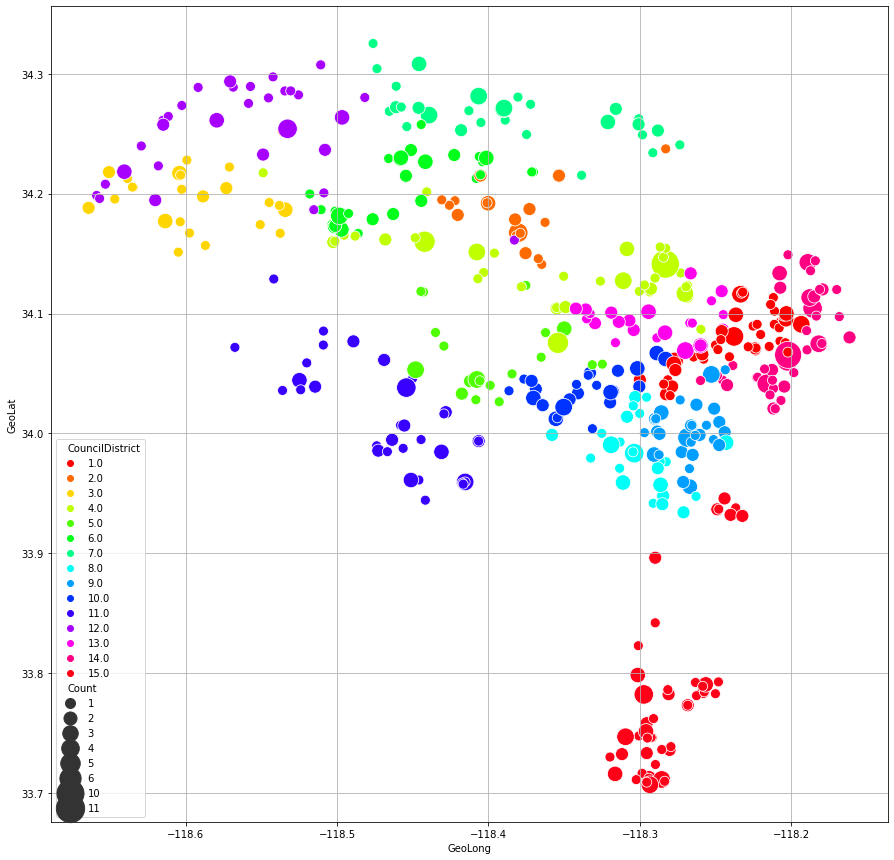

In [239]:
plt.figure(figsize=(15,15))
plt.grid()

sns.scatterplot(data = parks3, x="GeoLong", y="GeoLat", size='Count', \
                hue='CouncilDistrict',sizes=(100,800),legend='full', palette='hsv')

In [256]:
import descartes
import geopandas as geo
from shapely.geometry import Point, Polygon

%matplotlib inline

In [285]:
city = geo.read_file(geo.datasets.get_path('naturalearth_lowres'))
city

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...,...
172,6944975.0,Europe,Serbia,SRB,51475,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
173,622137.0,Europe,Montenegro,MNE,5542,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
174,1794248.0,Europe,Kosovo,-99,7926,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."
175,1394973.0,North America,Trinidad and Tobago,TTO,24269,"POLYGON ((-61.68000 10.76000, -61.10500 10.890..."


In [430]:
parks3[parks3['CouncilDistrict']==4]

,short_address,Count,LocationType,LocationName,Address,Website,Phone,CouncilDistrict,GeoLat,GeoLong,Council District
80,12061 Moorpa,1,Parks,MOORPARK PARK,"12061 Moorpark St., Studio City, CA 91604",https://www.laparks.org/park/moorpark,(818) 756-8189,4.0,34.150372,-118.396109,4
102,12601 Mulhol,1,Parks,WILACRE PARK,"12601 Mulholland Dr., Studio City, CA 91604 (A...",https://www.laparks.org/park/wilacre,(818) 756-8189,4.0,34.134247,-118.403166,4
103,12601 N. Mul,1,Parks,COLDWATER CANYON PARK,"12601 N. Mulholland Dr., Beverly Hills, CA 90210",https://www.laparks.org/park/coldwater-canyon,(818) 756-8190,4.0,34.129010,-118.407007,4
107,12621 Rye St,4,Recreation Center,STUDIO CITY RECREATION CENTER,"12621 Rye St., Studio City, CA 91604",https://www.laparks.org/reccenter/studio-city,(818) 769-4415,4.0,34.151350,-118.407691,4
139,141 S. Gardn,2,Senior Citizen Centers,PAN PACIFIC SENIOR ACTIVITY CENTER,"141 S. Gardner Ave. Los Angeles, CA 90036",https://www.laparks.org/scc/pan-pacific-activity,(323) 935-5705,4.0,34.072166,-118.353495,4
140,14101 Sherma,1,Parks,Greenwood Square Park,"14101 Sherman Way, Van Nuys, CA 91405",https://www.laparks.org/park/greenwood-square-...,NaN,4.0,34.201470,-118.440756,4
147,14201 Huston,6,Tennis Court,VAN NUYS SHERMAN OAKS TENNIS COURTS,"14201 Huston St., Sherman Oaks, CA 91423",https://www.laparks.org/sports/tennis/facility...,(818) 756-8400,4.0,34.159927,-118.442177,4
189,16633 Magnol,1,Horticulture,SEPULVEDA GARDEN CENTER,"16633 Magnolia Blvd., Encino, CA 91406",https://www.laparks.org/horticulture/sepulveda...,(818) 784-5180,4.0,34.165334,-118.495366,4
197,16953 Ventur,2,Parks,ENCINO PARK,"16953 Ventura Blvd., Encino, CA 91316",https://www.laparks.org/park/encino,(818) 995-1690,4.0,34.159602,-118.502487,4
220,1824 N Curso,2,Historic,WATTLES MANSION AND GARDENS,"1824 N Curson Ave., Los Angeles, CA 90046",https://www.laparks.org/historic/wattles-mansi...,(323) 969-9106,4.0,34.104363,-118.355027,4


In [303]:
#making pallete
park_palette = sns.blend_palette(['#800000','#e6194b','#fabed4','#f58231',\
                                  '#ffd8b1','#ffe119','#bfef45','#3cb44b',\
                                  '#42d4f4','#4363d8','#000075','#911eb4',\
                                  '#dcbeff','#f032e6'],15)
park_palette 

[(0.5019607843137255, 0.0, 0.0),
 (0.8690196078431373, 0.08996539792387542, 0.26989619377162627),
 (0.9674740484429065, 0.6385236447520184, 0.742883506343714),
 (0.9656286043829296, 0.5679354094579008, 0.350080738177624),
 (0.9890811226451365, 0.7531564782775855, 0.5543560169165704),
 (1.0, 0.8696193771626297, 0.3130949634755864),
 (0.860238369857747, 0.9129257977700884, 0.19412533640907342),
 (0.479061899269512, 0.8156708958093042, 0.2829527104959631),
 (0.24572087658592848, 0.7614917339484814, 0.587804690503652),
 (0.260238369857747, 0.6714955786236072, 0.9172472126105347),
 (0.18958861976163027, 0.28013840830449843, 0.7389619377162632),
 (0.14048442906574357, 0.0290657439446366, 0.5198615916955016),
 (0.6170703575547862, 0.2209919261822367, 0.7543252595155705),
 (0.8692041522491349, 0.6998846597462515, 0.991926182237601),
 (0.9411764705882353, 0.19607843137254902, 0.9019607843137255)]

In [427]:
parks3['Council District'] = parks3['CouncilDistrict'].astype(int)

/var/folders/6s/b1nxh7cj77gcbxknhl_sx7300000gn/T/ipykernel_44821/1535940034.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parks3['Council District'] = parks3['CouncilDistrict'].astype(int)


<AxesSubplot:>

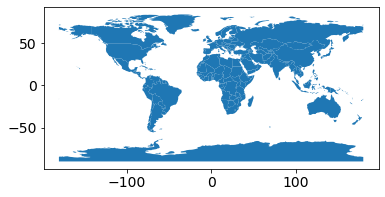

In [432]:
city.plot()

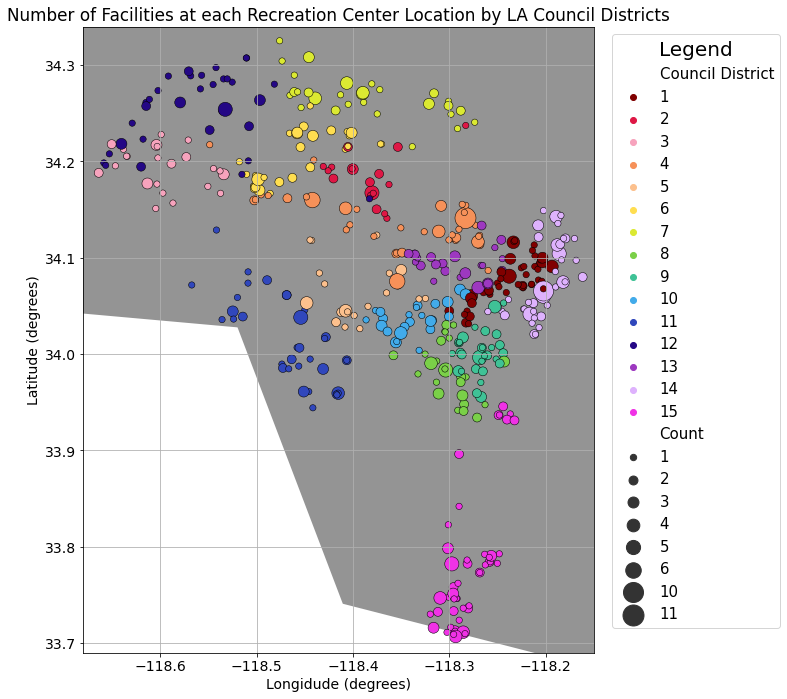

In [428]:
city.plot(aspect= "equal", color='#949494', figsize=(17.28,11.52))
matplotlib.rcParams.update({'font.size':14})
plt.grid()

sns.scatterplot(data = parks3, x="GeoLong", y="GeoLat", size='Count', \
                hue='Council District',sizes=([40,80,120,160,200,240,400,440]),legend='full', palette=park_palette, \
                edgecolor='black')

plt.xlim([-118.68, -118.15])
plt.ylim([33.69, 34.34])
plt.ylabel("Latitude (degrees)")
plt.xlabel("Longidude (degrees)")
plt.title("Number of Facilities at each Recreation Center Location by LA Council Districts")
plt.legend(loc='upper left',bbox_to_anchor=(1.02, 1), title='Legend', fontsize=15, title_fontsize=20)

plt.savefig("insightful_plot.jpeg", dpi=300, bbox_inches="tight")
plt.show()



In [431]:
parks[parks['short_address']=='4730 Crystal']

,LocationType,LocationName,Address,Website,Phone,CouncilDistrict,GeoLat,GeoLong,short_address
140,Parks,CRYSTAL SPRINGS,"4730 Crystal Springs Dr., Los Angeles, CA 90027",https://www.laparks.org/park/crystal-springs,(818) 243-1145,4.0,34.132843,-118.280164,4730 Crystal
280,Parks,GRIFFITH PARK,"4730 Crystal Springs Drive, Los Angeles, CA 90027",https://www.laparks.org/park/griffith,(323) 913-4688,4.0,34.132843,-118.280164,4730 Crystal
282,Camp Pool,GRIFFITH PARK BOYS' CAMP,"4730 Crystal Springs Dr., Los Angeles, CA 90027",https://www.laparks.org/camp/griffith-park-boy...,(323) 664-0571,4.0,34.142566,-118.286166,4730 Crystal
283,Camps,GRIFFITH PARK BOYS' CAMP,"4730 Crystal Springs Dr., Los Angeles, CA 90027",https://www.laparks.org/camp/griffith-park-boy...,(323) 664-0571,4.0,34.142566,-118.286166,4730 Crystal
287,Banquet,Griffith Park Visitor Center Auditorium,"4730 Crystal Springs Dr., Los Angeles, CA 90027",https://www.laparks.org/ranger/auditorium,(323) 665-1154,4.0,34.142566,-118.286166,4730 Crystal
288,Ranger,Griffith Park Visitor Center Auditorium,"4730 Crystal Springs Dr., Los Angeles, CA 90027",https://www.laparks.org/ranger/auditorium,(323) 665-1154,4.0,34.142566,-118.286166,4730 Crystal
308,Golf,Harding Golf Course,"4730 Crystal Springs Dr. Los Angeles, CA 90027",https://www.laparks.org/golf/harding-golf-course,NaN,4.0,34.141291,-118.283276,4730 Crystal
537,Parks,PARK CENTER (GRIFFITH PARK),"4730 Crystal Springs Dr., Los Angeles, CA 90027",https://www.laparks.org/park/griffith-0,(818) 243-1145,4.0,34.132817,-118.283590,4730 Crystal
538,Ranger,PARK FILM OFFICE,"4730 Crystal Springs Dr., Los Angeles, CA 90027",https://www.laparks.org/ranger/park-film-office,(323) 644-6220,4.0,34.142566,-118.286166,4730 Crystal
647,Playground,SHANE'S INSPIRATION - GRIFFITH PARK,"4730 Crystal Springs Dr., Los Angeles, CA 90027",https://www.laparks.org/playgrounds/griffithUAPk,NaN,4.0,34.142566,-118.286166,4730 Crystal
